# **Text Preprocessing and Wrangling**

Text wrangling (also called preprocessing or normalization) is a process that consists of
a series of steps to wrangle, clean, and standardize textual data into a form that could be
consumed by other NLP and intelligent systems powered by machine learning and deep
learning. Common techniques for preprocessing include cleaning text, tokenizing text,
removing special characters, case conversion, correcting spellings, removing stopwords
and other unnecessary terms, stemming, and lemmatization.

The key idea is to remove unnecessary content
from one or more text documents in a corpus (or corpora) and get clean text documents. The following list gives us an idea of some of the most popular text preprocessing and understanding techniques, which are:

*   Removing HTML tags
* Tokenization
* Removing unnecessary tokens and stopwords
* Handling contractions
* Correcting spelling errors
* Stemming
* Lemmatization
* Tagging
* Chunking
* Parsing


# ***Removing HTML Tags***

Often, unstructured text contains a lot of noise, especially if you use techniques
like web scraping or screen scraping to retrieve data from web pages, blogs, and
online repositories. HTML tags, JavaScript, and Iframe tags typically don’t add much
value to understanding and analyzing text. Our main intent is to extract meaningful
textual content from the data extracted from the web.

In [11]:
import requests
data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.content
print(content[1163:2200])

b'gin-top: 0;\r\n    margin-bottom: 0;\r\n}\r\n#pg-header #pg-machine-header strong {\r\n    font-weight: normal;\r\n}\r\n#pg-header #pg-start-separator, #pg-footer #pg-end-separator {\r\n    margin-bottom: 3em;\r\n    margin-left: 0;\r\n    margin-right: auto;\r\n    margin-top: 2em;\r\n    text-align: center\r\n}\r\n\r\n    .xhtml_center {text-align: center; display: block;}\r\n    .xhtml_center table {\r\n        display: table;\r\n        text-align: left;\r\n        margin-left: auto;\r\n        margin-right: auto;\r\n        }</style><title>The Project Gutenberg eBook of The Bible, King James version, Book 1: Genesis, by Anonymous</title><style>/* ************************************************************************\r\n * classless css copied from https://www.pgdp.net/wiki/CSS_Cookbook/Styles\r\n * ********************************************************************** */\r\n/* ************************************************************************\r\n * set the body margins t

In [12]:
import re
from bs4 import BeautifulSoup
def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

In [13]:
clean_content = strip_html_tags(content)
print(clean_content[1163:2045])

oid; and darkness was
           upon the face of the deep. And the Spirit of God moved upon
           the face of the waters.
01:001:003 And God said, Let there be light: and there was light.
01:001:004 And God saw the light, that it was good: and God divided the
           light from the darkness.
01:001:005 And God called the light Day, and the darkness he called
           Night. And the evening and the morning were the first day.
01:001:006 And God said, Let there be a firmament in the midst of the
           waters, and let it divide the waters from the waters.
01:001:007 And God made the firmament, and divided the waters which were
           under the firmament from the waters which were above the
           firmament: and it was so.
01:001:008 And God called the firmament Heaven. And the evening and the
           morning were the second day.
01:001:009 And Go


# ***Text Tokenization***

Tokens are
independent and minimal textual components that have some definite syntax and
semantics. A paragraph of text or a text document has several components, including
sentences, which can be further broken down into clauses, phrases, and words. The
most popular tokenization techniques include sentence and word tokenization, which
are used to break down a text document (or corpus) into sentences and each sentence
into words. Thus, tokenization can be defined as the process of breaking down or
splitting textual data into smaller and more meaningful components called tokens. In the
following sections, we look at some ways to tokenize text into sentences and words.

# **Sentence Tokenization**


Sentence tokenization is the process of splitting a text corpus into sentences that act
as the first level of tokens the corpus is comprised of. This is also known as sentence
segmentation, since we try to segment the text into meaningful sentences. Any text
corpus is a body of text where each paragraph comprises several sentences. There are
various ways to perform sentence tokenization. Basic techniques include looking for
specific delimiters between sentences like a period (.) or a newline character (\n) and
sometimes even a semicolon (;). We will use the NLTK framework, which provides
various interfaces for performing sentence tokenization. We primarily focus on the
following sentence tokenizers:
* sent_tokenize
* Pretrained sentence tokenization models
* PunktSentenceTokenizer
* RegexpTokenizer

Before we can tokenize sentences, we need some text on which we can try these
operations. We load some sample text and part of the Gutenberg corpus available in
NLTK. We load the necessary dependencies using the following snippet.

In [14]:
import nltk
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np

In [15]:
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [16]:
# loading text corpora
alice = gutenberg.raw(fileids='carroll-alice.txt')

In [17]:
sample_text = """US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."""

In [18]:
sample_text

"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

We can check the length of the “Alice in Wonderland” corpus and the first few lines in
it using the following snippet.

In [19]:
# Total characters in Alice in Wonderland
len(alice)

144395

In [20]:
# First 100 characters in the corpus
alice[0:100]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was"

**Default Sentence Tokenizer**

The nltk.sent_tokenize(...) function is the default sentence tokenization function
that NLTK recommends and it uses an instance of the PunktSentenceTokenizer class
internally. However, this is not just a normal object or instance of that class. It has been
pretrained on several language models and works really well on many popular languages
besides English. The following snippet shows the basic usage of this function on our text
samples

In [21]:
default_st = nltk.sent_tokenize
nltk.download('punkt')
alice_sentences = default_st(text=alice)
sample_sentences = default_st(text=sample_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
print('Total sentences in sample_text:', len(sample_sentences))
print('Sample text sentences :-')
print(np.array(sample_sentences))
print('\nTotal sentences in alice:', len(alice_sentences))
print('First 5 sentences in alice:-')
print(np.array(alice_sentences[0:5]))

Total sentences in sample_text: 4
Sample text sentences :-
["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']

Total sentences in alice: 1625
First 5 sentences in alice:-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I."
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"
 

**Pretrained Sentence Tokenizer Models**

Suppose we were dealing with German text. We can use sent_tokenize, which
is already trained, or load a pretrained tokenization model on German text into a
PunktSentenceTokenizer instance and perform the same operation. The following
snippet shows this. We start by loading a German text corpus and inspecting it


In [23]:
from nltk.corpus import europarl_raw
nltk.download('europarl_raw')
german_text = europarl_raw.german.raw(fileids='ep-00-01-17.de')
# Total characters in the corpus
print(len(german_text))
# First 100 characters in the corpus
print(german_text[0:100])

[nltk_data] Downloading package europarl_raw to /root/nltk_data...
[nltk_data]   Unzipping corpora/europarl_raw.zip.


157171
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sit


In [24]:
# default sentence tokenizer
german_sentences_def = default_st(text=german_text, language='german')

In [25]:
# loading german text tokenizer into a PunktSentenceTokenizer instance
german_tokenizer = nltk.data.load(resource_url='tokenizers/punkt/german.pickle')
german_sentences = german_tokenizer.tokenize(german_text)

In [26]:
# verify the type of german_tokenizer
# should be PunktSentenceTokenizer
print(type(german_tokenizer))

<class 'nltk.tokenize.punkt.PunktSentenceTokenizer'>


In [27]:
# check if results of both tokenizers match
# should be True
print(german_sentences_def == german_sentences)

True


**PunktSentenceTokenizer**
Using the default PunktSentenceTokenizer class is also pretty straightforward, as the
following snippet shows.


In [28]:
punkt_st = nltk.tokenize.PunktSentenceTokenizer()
sample_sentences = punkt_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


**RegexpTokenizer**


The last tokenizer we cover in sentence tokenization is using an instance of the
RegexpTokenizer class to tokenize text into sentences, where we will use specific regular
expression-based patterns to segment sentences. Recall the regular expressions from the
previous chapter if you want to refresh your memory. The following snippet shows how
to use a regex pattern to tokenize sentences

In [29]:
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'
regex_st = nltk.tokenize.RegexpTokenizer(pattern=SENTENCE_TOKENS_PATTERN,gaps=True)
sample_sentences = regex_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


# **Word Tokenization**


Word tokenization is the process of splitting or segmenting sentences into their
constituent words. A sentence is a collection of words and with tokenization we
essentially split a sentence into a list of words that can be used to reconstruct the
sentence. Word tokenization is really important in many processes, especially in
cleaning and normalizing text where operations like stemming and lemmatization work
on each individual word based on its respective stems and lemma. Similar to sentence
tokenization, NLTK provides various useful interfaces for word tokenization. We will
touch up on the following main interfaces:
* word_tokenize
* TreebankWordTokenizer
* TokTokTokenizer
* RegexpTokenizer
* Inherited tokenizers from RegexpTokenizer

**Default Word Tokenizer**

The nltk.word_tokenize(...) function is the default and recommended word
tokenizer, as specified by NLTK. This tokenizer is an instance or object of the
TreebankWordTokenizer class in its internal implementation and acts as a wrapper to
that core class. The following snippet illustrates its usage.

In [30]:
default_wt = nltk.word_tokenize
words = default_wt(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

**TreebankWordTokenizer**

The TreebankWordTokenizer is based on the Penn Treebank and uses various regular
expressions to tokenize the text. Of course, one primary assumption here is that we have
already performed sentence tokenization beforehand. Some of the main features of this tokenizer are mentioned here:
* Splits and separates out periods that appear at the end of a sentence
* Splits and separates commas and single quotes when followed by whitespace
* Most punctuation characters are split and separated intobindependent tokens
* Splits words with standard contractions, such as don’t to do and n’t

In [31]:
treebank_wt = nltk.TreebankWordTokenizer()
words = treebank_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

**TokTokTokenizer**


TokTokTokenizer is one of the newer tokenizers introduced by NLTK present in the
nltk.tokenize.toktok module. In general, the tok-tok tokenizer is a general tokenizer,
where it assumes that the input has one sentence per line. Hence, only the final period
is tokenized. However, as needed, we can remove the other periods from the words
using regular expressions. Tok-tok has been tested on, and gives reasonably good results
for, English, Persian, Russian, Czech, French, German, Vietnamese, and many other
languages.

In [32]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
words = tokenizer.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "'", ',', 'beating',
       'the', 'previous', 'record-holder', 'China', "'", 's', 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

**RegexpTokenizer**


We now look at how to use regular expressions and the RegexpTokenizer class to
tokenize sentences into words. Remember that there are two main parameters that
are useful in tokenization—the regex pattern for building the tokenizer and the gaps
parameter, which, if set to true, is used to find the gaps between the tokens. Otherwise, it
is used to find the tokens themselves.

In [33]:
# pattern to identify tokens themselves
TOKEN_PATTERN = r'\w+'
regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN,gaps=False)
words = regex_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', 's', 'most', 'powerful', 'supercomputer',
       'beats', 'China', 'The', 'US', 'has', 'unveiled', 'the', 'world',
       's', 'most', 'powerful', 'supercomputer', 'called', 'Summit',
       'beating', 'the', 'previous', 'record', 'holder', 'China', 's',
       'Sunway', 'TaihuLight', 'With', 'a', 'peak', 'performance', 'of',
       '200', '000', 'trillion', 'calculations', 'per', 'second', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       'which', 'is', 'capable', 'of', '93', '000', 'trillion',
       'calculations', 'per', 'second', 'Summit', 'has', '4', '608',
       'servers', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts'], dtype='<U13')

**Inherited Tokenizers from RegexpTokenizer**

Besides the base RegexpTokenizer class, there are several derived classes that
perform different types of word tokenization. The WordPunktTokenizer uses the pattern
r'\w+|[^\w\s]+' to tokenize sentences into independent alphabetic and
non-alphabetic tokens.

In [34]:
wordpunkt_wt = nltk.WordPunctTokenizer()
words = wordpunkt_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', "',", 'beating', 'the',
       'previous', 'record', '-', 'holder', 'China', "'", 's', 'Sunway',
       'TaihuLight', '.', 'With', 'a', 'peak', 'performance', 'of', '200',
       ',', '000', 'trillion', 'calculations', 'per', 'second', ',', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       ',', 'which', 'is', 'capable', 'of', '93', ',', '000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4', ',',
       '608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

The WhitespaceTokenizer tokenizes sentences into words based on whitespace, like
tabs, newlines, and spaces. The following snippet shows demonstrations of these tokenizers.

In [35]:
whitespace_wt = nltk.WhitespaceTokenizer()
words = whitespace_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit',", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

***Building Robust Tokenizers***

For a typical NLP pipeline, I recommend leveraging state-of-the-art libraries like NLTK and using some of their robust utilities to build a custom function to perform
both sentence- and word-level tokenization. A simple example is depicted in the
following snippets. We start with looking at how we can leverage NLTK.

In [36]:
def tokenize_text(text):
  sentences = nltk.sent_tokenize(text)
  word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
  return word_tokens

In [37]:
sents = tokenize_text(sample_text)
np.array(sents)

<ipython-input-37-1723b8566941>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sents)


array([list(['US', 'unveils', 'world', "'s", 'most', 'powerful', 'supercomputer', ',', 'beats', 'China', '.']),
       list(['The', 'US', 'has', 'unveiled', 'the', 'world', "'s", 'most', 'powerful', 'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the', 'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight', '.']),
       list(['With', 'a', 'peak', 'performance', 'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion', 'calculations', 'per', 'second', '.']),
       list(['Summit', 'has', '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size', 'of', 'two', 'tennis', 'courts', '.'])],
      dtype=object)

# ***Removing Accented Characters***

Usually in any text corpus, you might be dealing with accented characters/letters, especially
if you only want to analyze the English language. Hence, we need to make sure that these
characters are converted and standardized into ASCII characters. This shows a simple
example—converting é to e. The following function is a simple way of tackling this task.

In [38]:
import unicodedata

In [39]:
def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

In [40]:
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

#***Expanding Contractions***

Contractions are shortened versions of words or syllables. These exist in written and
spoken forms. Shortened versions of existing words are created by removing specific
letters and sounds. In the case of English contractions, they are often created by
removing one of the vowels from the word. Examples include “is not” to “isn’t” and
“will not” to “won’t”, where you can notice the apostrophe being used to denote the
contraction and some of the vowels and other letters being removed.


In [41]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.5 MB/s eta 0:00:00


In [42]:
# import library
import contractions
from contractions import contractions_dict
import re

In [43]:
def expand_contractions(text, contraction_mapping=contractions_dict):
  contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE|re.DOTALL)

  def expand_match(contraction):
    match = contraction.group(0)
    first_char = match[0]
    expanded_contraction = contraction_mapping.get(match)\
                          if contraction_mapping.get(match)\
                          else contraction_mapping.get(match.lower())
    expanded_contraction = first_char+expanded_contraction[1:]
    return expanded_contraction
  expanded_text = contractions_pattern.sub(expand_match, text)
  expanded_text = re.sub("'", "", expanded_text)
  return expanded_text

In [44]:
expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

# ***Removing Special Characters***

Special characters and symbols are usually non-alphanumeric characters or even
occasionally numeric characters (depending on the problem), which add to the extra
noise in unstructured text. Usually, simple regular expressions (regexes) can be used to
remove them. The following code helps us remove special characters

In [45]:
def remove_special_characters(text, remove_digits=False):
  pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
  text = re.sub(pattern, '', text)
  return text

In [46]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

# ***Case Conversions***

Often you might want to modify the case of words or sentences to make things easier,
like matching specific words or tokens. Usually, there are two types of case conversion
operations that are used a lot. These are lower- and uppercase conversions, where a
body of text is converted completely to lowercase or uppercase. There are other forms
also like sentence case or title case. Lowercase is a form where all the letters of the text
are small letters and in uppercase they are all capitalized. Title case will capitalize the
first letter of each word in the sentence.

In [47]:
# lowercase
text = 'The quick brown fox jumped over The Big Dog'
text.lower()


'the quick brown fox jumped over the big dog'

In [48]:
# uppercase
text.upper()

'THE QUICK BROWN FOX JUMPED OVER THE BIG DOG'

In [49]:
# title case
text.title()

'The Quick Brown Fox Jumped Over The Big Dog'

# ***Text Correction***

One of the main challenges faced in text wrangling is the presence of incorrect words
in the text. The definition of incorrect here covers words that have spelling mistakes as
well as words with several letters repeated that do not contribute much to its overall
significance. To illustrate some examples, the word “finally” could be mistakenly written
as “fianlly” or someone expressing intense emotion could write it as “finalllllyyyyyy”.

**Correcting Repeating Characters**

We just mentioned words that often contain several repeating characters that could be
due to incorrect spellings, slang language, or even people wanting to express strong
emotions. We show a method here that uses a combination of syntax and semantics to
correct these words. We start by correcting the syntax of these words and then move on
to semantics.

We will now utilize the WordNet
corpus to check for valid words at each stage and terminate the loop once it is obtained.
This introduces the semantic correction needed for our algorithm, as illustrated in the
following snippet.


In [55]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
from nltk.corpus import wordnet
def remove_repeated_characters(tokens):
  repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
  match_substitution = r'\1\2\3'

  def replace(old_word):
    if wordnet.synsets(old_word):
      return old_word
    new_word = repeat_pattern.sub(match_substitution, old_word)
    return replace(new_word) if new_word != old_word else new_word
  correct_tokens = [replace(word) for word in tokens]
  return correct_tokens

In this snippet, we use the inner function replace() to basically emulate the
behavior of our algorithm that we illustrated earlier and then call it repeatedly on each
token in a sentence in the outer function remove_repeated_characters()

In [60]:
sample_sentence = 'GLA is realllllyyy amaaazingggg'
correct_tokens = remove_repeated_characters(nltk.word_tokenize(sample_sentence))
' '.join(correct_tokens)

'GLA is really amazing'

**Correcting Spellings**
The second problem we face with words is incorrect or wrong spellings that occur due to
human error and even machine based errors, which you might have seen with features
like auto-correcting text. There are various ways to deal with incorrect spellings where
the final objective is to have tokens of text with the correct spelling.

In [61]:
from textblob import Word
w = Word('fianlly')
w.correct()

'finally'

In [62]:
# check suggestions
w.spellcheck()

[('finally', 1.0)]

In [63]:
# another example
w = Word('flaot')
w.spellcheck()

[('flat', 0.85), ('float', 0.15)]

# ***Stemming***
To understand the process of stemming, we need to understand what word stems
represent. We talked about morphemes, which are the smallest independent unit in any natural language. Morphemes consist of units that are stems and affixes. Affixes are units like prefixes, suffixes, and so on, which are attached to word stems to change their meaning or create a new word altogether. Word stems are also
often known as the base form of a word and we can create new words by attaching affixes
to them. This process is known as inflection. The reverse of this is obtaining the base
form of a word from its inflected form and this is known as stemming.

Consider the word “JUMP”, you can add affixes to it and form several new words like
“JUMPS”, “JUMPED”, and “JUMPING”. In this case, the base word is “JUMP” and this is
the word stem. If we were to carry out stemming on any of its three inflected forms, we
would get the base form.

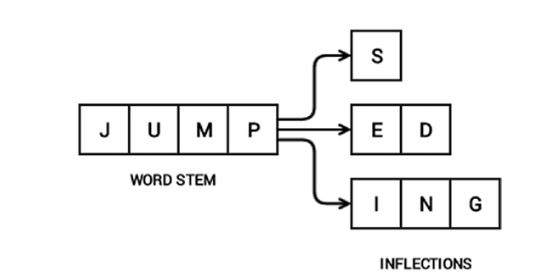

Stemming helps us standardize
words to their base stem irrespective of their inflections, which helps many applications
like classifying or clustering text or even in information retrieval. Search engines use
such techniques extensively to give better accurate results irrespective of the word form.
The NLTK package has several implementations for stemmers. These stemmers are
implemented in the stem module, which inherits the StemmerI interface in the nltk.
stem.api module.

One of the most popular stemmers is the Porter
stemmer, which is based on the algorithm developed by its inventor, Martin Porter.
Originally, the algorithm is said to have a total of five different phases for reduction of
inflections to their stems, where each phase has its own set of rules. There also exists a
Porter2 algorithm, which was the original stemming algorithm with some improvements
suggested by Dr. Martin Porter.

In [64]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [65]:
ps.stem('lying')

'lie'

In [66]:
ps.stem('strange')

'strang'

he Lancaster stemmer is based on the Lancaster stemming algorithm, also
often known as the Paice/Husk stemmer, which was invented by Chris D. Paice.

In [67]:
# Lancaster Stemmer
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
ls.stem('jumping'), ls.stem('jumps'), ls.stem('jumped')


('jump', 'jump', 'jump')

In [68]:
ls.stem('lying')

'lying'

In [69]:
ls.stem('strange')

'strange'

# ***Lemmatization***
The process of lemmatization is very similar to stemming, where we remove word affixes
to get to a base form of the word. However in this case, this base form is also known
as the root word but not the root stem. The difference between the two is that the root
stem may not always be a lexicographically correct word, i.e., it may not be present in
the dictionary but the root word, also known as the lemma, will always be present in the
dictionary.

The lemmatization process is considerably slower than stemming because an
additional step is involved where the root form or lemma is formed by removing the affix
from the word if and only if the lemma is present in the dictionary. The NLTK package
has a robust lemmatization module where it uses WordNet and the word’s syntax and
semantics like part of speech and context to get the root word or lemma.


In [70]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

# lemmatize nouns
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('men', 'n'))

# lemmatize verbs
print(wnl.lemmatize('running', 'v'))
print(wnl.lemmatize('ate', 'v'))

# lemmatize adjectives
print(wnl.lemmatize('saddest', 'a'))
print(wnl.lemmatize('fancier', 'a'))

car
men
run
eat
sad
fancy


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
def lemmatize_text(words):
     from nltk.stem import WordNetLemmatizer
     from nltk.tokenize import word_tokenize
     lemmatizer = WordNetLemmatizer()
     a = []
     tokens = word_tokenize(words)
     for token in tokens:
          lemmetized_word = lemmatizer.lemmatize(token)
          a.append(lemmetized_word)
     sentence = " ".join(a)
     return sentence

In [85]:
text = "Students' studies are for making teachers cry. Teachers' cries are for NLTK sentence example."

In [86]:
lemmatize_text(text)

"Students ' study are for making teacher cry . Teachers ' cry are for NLTK sentence example ."

# ***Removing Stopwords***
Stopwords are words that have little or no significance and are usually removed from
text when processing it so as to retain words having maximum significance and context.
Stopwords usually occur most frequently if you aggregate a corpus of text based on
singular tokens and checked their frequencies. Words like “a,” “the,” “and,” and so on are
stopwords. There is no universal or exhaustive list of stopwords and often each domain
or language has its own set of stopwords. We depict a method to filter out and remove
stopwords for English in the following code snippet


In [87]:
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=False):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer'

# ***Bringing It All Together — Building a Text Normalizer***


Let’s now bring everything we learned together and chain these operations to build a text
normalizer to preprocess text data. We focus on including the major components often
used for text wrangling in our custom function

In [89]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
accented_char_removal=True, text_lower_case=True,
text_lemmatization=True, special_char_removal=True,
stopword_removal=True, remove_digits=True):
  normalized_corpus = []
  # normalize each document in the corpus
  for doc in corpus:
    # strip HTML
    if html_stripping:
      doc = strip_html_tags(doc)
    # remove accented characters
    if accented_char_removal:
      doc = remove_accented_chars(doc)
    # expand contractions
    if contraction_expansion:
      doc = expand_contractions(doc)
    # lowercase the text
    if text_lower_case:
      doc = doc.lower()
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
    # lemmatize text
    if text_lemmatization:
      doc = lemmatize_text(doc)
    # remove special characters and\or digits
    if special_char_removal:
      # insert spaces between special characters to isolate them
      special_char_pattern = re.compile(r'([{.(-)!}])')
      doc = special_char_pattern.sub(" \\1 ", doc)
      doc = remove_special_characters(doc, remove_digits=remove_digits)
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
    # remove stopwords
    if stopword_removal:
      doc = remove_stopwords(doc, is_lower_case=text_lower_case)

    normalized_corpus.append(doc)
  return normalized_corpus

In [90]:
sample_text

"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

In [91]:
normalize_corpus([sample_text])[0]

'u unveils world powerful supercomputer beat china u ha unveiled world powerful supercomputer called summit beating previous recordholder china sunway taihulight peak performance trillion calculation per second twice fast sunway taihulight capable trillion calculation per second summit ha server reportedly take size two tennis court'